# Analyse Exploratoire des Données sur le Dataset al_players_clean
Le jeux de données contient des données détaillées sur les joueurs de football, issues du jeu vidéo EA Sports.
- Analyser les postes: certains postes sont-ils plus présents dans certains ligues.
- Calculer la puissance (Sprint.Speed*Strength). Analyser le rapport poids:puissance par rapport au poste. Déduire, si possible des directives de recrutement.

In [86]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration des graphiques
plt.style.use('ggplot')

In [87]:
# Charger le jeu de données Titanic
df = pd.read_csv('all_players_clean.csv')  # Assurez-vous que le fichier est dans le bon répertoire

# Afficher les 5 premières lignes du dataset
df.head()

,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,Sprint.Speed,...,Nation,League,Team,url,GK.Diving,GK.Handling,GK.Kicking,GK.Positioning,GK.Reflexes,gender
0,Kylian Mbappé,91,97,90,80,92,36,78,97,97,...,France,LALIGA EA SPORTS,Real Madrid,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,M
1,Rodri,91,66,80,86,84,87,85,65,66,...,Spain,Premier League,Manchester City,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,M
2,Erling Haaland,91,88,92,70,81,45,88,80,94,...,Norway,Premier League,Manchester City,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,M
3,Jude Bellingham,90,80,87,83,88,78,83,81,80,...,England,LALIGA EA SPORTS,Real Madrid,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,M
4,Vini Jr.,90,95,84,81,91,29,69,95,95,...,Brazil,LALIGA EA SPORTS,Real Madrid,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,M


## Aperçu des Données

Examinez la structure du dataset : combien de lignes et de colonnes contient-il ? Quels types de données sont présents ? Utilisez ces informations

In [12]:
# Dimensions du dataset
df.shape
# Types de données et aperçu des colonnes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17737 entries, 0 to 17736
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   17737 non-null  object 
 1   OVR                    17737 non-null  int64  
 2   PAC                    17737 non-null  int64  
 3   SHO                    17737 non-null  int64  
 4   PAS                    17737 non-null  int64  
 5   DRI                    17737 non-null  int64  
 6   DEF                    17737 non-null  int64  
 7   PHY                    17737 non-null  int64  
 8   Acceleration           17737 non-null  int64  
 9   Sprint.Speed           17737 non-null  int64  
 10  Positioning            16620 non-null  float64
 11  Finishing              16684 non-null  float64
 12  Shot.Power             17737 non-null  int64  
 13  Long.Shots             16739 non-null  float64
 14  Volleys                16681 non-null  float64
 15  Pe

Le jeu de données présenté contient 17 737 observations (c'est-à-dire des joueurs de football individuels) et 55 variables (représentant différentes caractéristiques et performances des joueurs). La population étudiée est constituée de joueurs de football issus du jeu vidéo EA Sports. Chaque observation représente un joueur, avec des attributs liés à ses performances et ses statistiques dans le jeu.

## Analyse Univariée
Comme nous avons plusieurs varibales, nous allons juste faire une étude univariée sur les variables que nous utiliserons

## Création d'une fonction qui permettra de faire la description d'une variable catégorielle

In [13]:

# Fonction qui génère un tableau et un graphique pour une variable catégorielle
def analyse_categorielle(df, variable, titre_graphique="Répartition des catégories", titre_x="Catégories", titre_y="Fréquence (%)"):
    # Calcul des effectifs pour la variable choisie, triés par ordre décroissant
    effectifs = df[variable].value_counts().sort_values(ascending=False)

    # Calcul des fréquences en pourcentage
    frequences = (effectifs / effectifs.sum()) * 100

    # Créer un tableau avec les informations demandées
    tableau = pd.DataFrame({
        'Effectif': effectifs,
        'Fréquence (%)': frequences.round(2)
    })

    # Ajouter une ligne 'Total' dans le tableau
    tableau.loc['Total'] = [effectifs.sum(), frequences.sum().round(2)]

    # Afficher le tableau
    print(tableau)

    # Tracer un diagramme des fréquences en pourcentage
    plt.figure(figsize=(8, 6))
    sns.barplot(x=effectifs.index, y=frequences.values, palette='Blues_d')
    plt.title(titre_graphique)
    plt.xlabel(titre_x)
    plt.ylabel(titre_y)
    plt.xticks(rotation=0)
    plt.show()




### Variable Position

          Effectif  Fréquence (%)
Position                         
CB          3185.0          17.96
ST          2425.0          13.67
CM          2139.0          12.06
GK          1999.0          11.27
CDM         1447.0           8.16
RB          1404.0           7.92
LB          1333.0           7.52
LM          1035.0           5.84
CAM         1024.0           5.77
RM           961.0           5.42
RW           402.0           2.27
LW           383.0           2.16
Total      17737.0         100.00


C:\Users\samba\AppData\Local\Temp\ipykernel_2368\3354903562.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=effectifs.index, y=frequences.values, palette='Blues_d')


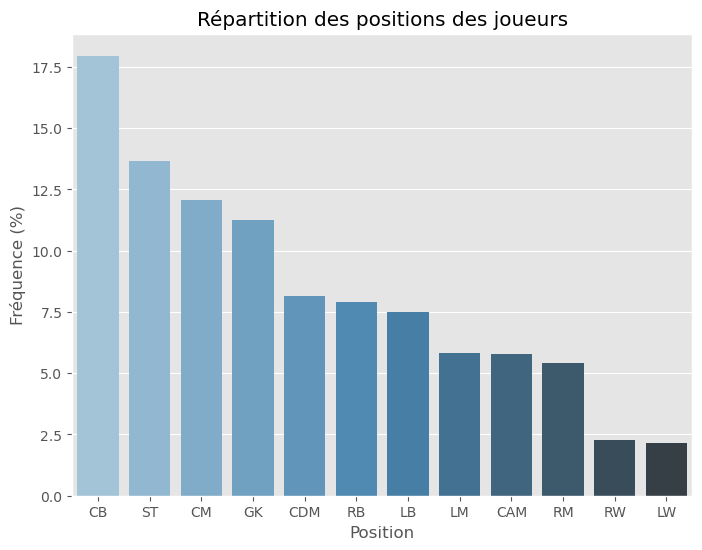

In [14]:
# Utilisation avec la variable 'Position'
analyse_categorielle(df, 'Position', titre_graphique="Répartition des positions des joueurs", titre_x="Position", titre_y="Fréquence (%)")

Dans le jeu EA Sports, nous avons plus de défenseurs centraux (CB) avec 3185 joueurs, soit 17,96 % des joueurs, suivis des attaquants (ST) avec 13,67 % des joueurs. Les milieux droits (RM), ailiers droits (RW) et ailiers gauches (LW) occupent les dernières positions avec respectivement 5,42 %, 2,27 % et 2,16 % des joueurs.

### Variable ligue

                         Effectif  Fréquence (%)
League                                          
Sudamericana                826.0           4.66
MLS                         762.0           4.30
EFL Championship            683.0           3.85
EFL League One              615.0           3.47
Premier League              597.0           3.37
Libertadores                574.0           3.24
EFL League Two              562.0           3.17
Serie A Enilive             537.0           3.03
LALIGA EA SPORTS            529.0           2.98
Bundesliga 2                503.0           2.84
LALIGA HYPERMOTION          496.0           2.80
3. Liga                     496.0           2.80
Bundesliga                  485.0           2.73
Ligue 1 McDonald's          464.0           2.62
CSL                         449.0           2.53
PKO BP Ekstraklasa          444.0           2.50
K League 1                  435.0           2.45
Eredivisie                  431.0           2.43
Serie BKT           

C:\Users\samba\AppData\Local\Temp\ipykernel_2368\3354903562.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=effectifs.index, y=frequences.values, palette='Blues_d')


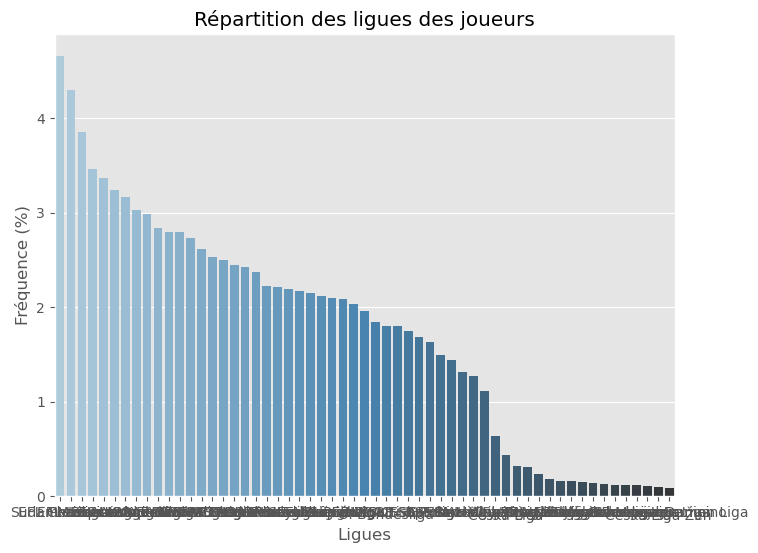

In [15]:
# Utilisation avec la variable 'Leadue'
analyse_categorielle(df, 'League', titre_graphique="Répartition des ligues des joueurs", titre_x="Ligues", titre_y="Fréquence (%)")

### Fonction pour obtenir le nombre de modalités qui ont un fréquence supérireur ou égal à un seuil

In [76]:

# Fonction pour obtenir le nombre de ligues avec une fréquence >= seuil (le seuil peut être un float)
def count_leagues_above_threshold(df, variable, seuil=2.0):
    """
    Compte le nombre de catégories dans une variable dont la fréquence est supérieure ou égale au seuil.

    Parameters:
    df (DataFrame): Le DataFrame contenant les données.
    variable (str): Le nom de la variable catégorielle à analyser.
    seuil (float): Le seuil de fréquence minimum en pourcentage (par exemple, 2.0 pour 2%).

    Returns:
    int: Le nombre de catégories au-dessus du seuil de fréquence.
    """
    # Calcul des effectifs pour la variable choisie, triés par ordre décroissant
    effectifs = df[variable].value_counts().sort_values(ascending=False)
    
    # Calcul des fréquences en pourcentage
    frequences = (effectifs / effectifs.sum()) * 100
    
    # Filtrer les ligues avec une fréquence >= seuil
    ligues_above_threshold = frequences[frequences >= seuil]
    
    # Retourner le nombre de ligues au-dessus du seuil
    return len(ligues_above_threshold)




In [44]:
# Utilisation avec la variable 'League'
nombre_ligues = count_leagues_above_threshold(df, 'League', seuil=2.0)
print(f"Nombre de ligues avec une fréquence >= 2% : {nombre_ligues}")

Nombre de ligues avec une fréquence >= 2% : 28


### Fonction pour recupérer que les ligues qui ont une fréquence données
Nous avons choisi le seuil de 2%, car une ligue qui regroupe au moins 2% des joueurs compte environ 354 joueurs, ce qui correspond à une ligue d'environ 14 équipes. Ce seuil nous permet d'obtenir une meilleure représentation dans les graphes et d'assurer que les ligues sélectionnées disposent d'un effectif suffisamment significatif pour être analysées de manière pertinente.

In [77]:
import pandas as pd

# Fonction généralisée pour filtrer les lignes d'un DataFrame selon la fréquence d'une variable
def filter_by_frequency(df_source, variable, seuil=2.0):
    """
    Filtre les lignes du DataFrame df_source selon la fréquence de la variable choisie et 
    stocke le résultat dans df_target.
    
    Parameters:
    df_source (DataFrame): Le DataFrame source à analyser
    df_target (DataFrame): Le DataFrame cible où les résultats filtrés seront stockés
    variable (str): Le nom de la variable catégorielle à analyser
    seuil (float): Le seuil de fréquence minimum (en pourcentage) pour filtrer les lignes
    
    Returns:
    DataFrame: Un nouveau DataFrame contenant les lignes filtrées
    """
    # Calcul des effectifs pour la variable choisie, triés par ordre décroissant
    effectifs = df_source[variable].value_counts().sort_values(ascending=False)
    
    # Calcul des fréquences en pourcentage
    frequences = (effectifs / effectifs.sum()) * 100
    
    # Obtenir les catégories de la variable qui ont une fréquence >= seuil
    categories_above_threshold = frequences[frequences >= seuil].index
    
    # Filtrer le DataFrame source pour garder uniquement les lignes correspondantes aux catégories
    df_target = df_source[df_source[variable].isin(categories_above_threshold)]
    
    return df_target




In [46]:
# utilisation avec un DataFrame source et une variable
df_2 = filter_by_frequency(df, 'League', seuil=2.0)

# Affichage du DataFrame filtré
print(df_2)

                  Name  OVR  PAC  SHO  PAS  DRI  DEF  PHY  Acceleration  \
0        Kylian Mbappé   91   97   90   80   92   36   78            97   
1                Rodri   91   66   80   86   84   87   85            65   
2       Erling Haaland   91   88   92   70   81   45   88            80   
3      Jude Bellingham   90   80   87   83   88   78   83            81   
4             Vini Jr.   90   95   84   81   91   29   69            95   
...                ...  ...  ...  ...  ...  ...  ...  ...           ...   
16154    Park Jin Hong   47   65   36   43   47   36   58            68   
16157    Ousmane Sylla   47   67   38   46   45   40   55            66   
16158         Wei Feng   47   57   47   38   50   43   49            55   
16159       Won Hui Do   47   66   35   46   46   41   64            69   
16160        Wu Yuhang   47   56   34   43   45   43   54            51   

       Sprint.Speed  ...          Nation            League             Team  \
0                97 

In [88]:

# df_2 contient les données filtrées

# Calcul des effectifs et fréquences pour la variable 'League' dans df_2
effectifs_league = df_2['League'].value_counts().sort_values(ascending=False)
frequences_league = (effectifs_league / effectifs_league.sum()) * 100

# Créer un tableau avec les informations demandées
tableau_league = pd.DataFrame({
    'Effectif': effectifs_league,
    'Fréquence (%)': frequences_league.round(2)
})

# Afficher le tableau des ligues
print(tableau_league)

# Créer un graphique interactif avec Plotly Express
fig = px.bar(
    tableau_league.reset_index(),
    x='League',
    y='Fréquence (%)',
    text='Effectif',
    hover_data={'Fréquence (%)': ':.2f', 'Effectif': True},
    labels={'League': 'Ligues'},
    title="Répartition des ligues des joueurs"
)

# Personnalisation des écritures et inclinaison des labels de l'axe x
fig.update_layout(
    xaxis_tickangle=-45,  # Incliner les labels à 45 degrés
    font=dict(size=10),  # Diminuer la taille des écritures
    showlegend=False
)

# Afficher le graphique interactif
fig.show()


                    Effectif  Fréquence (%)
League                                     
Sudamericana             826           6.02
MLS                      762           5.55
EFL Championship         683           4.97
EFL League One           615           4.48
Premier League           597           4.35
Libertadores             574           4.18
EFL League Two           562           4.09
Serie A Enilive          537           3.91
LALIGA EA SPORTS         529           3.85
Bundesliga 2             503           3.66
3. Liga                  496           3.61
LALIGA HYPERMOTION       496           3.61
Bundesliga               485           3.53
Ligue 1 McDonald's       464           3.38
CSL                      449           3.27
PKO BP Ekstraklasa       444           3.23
K League 1               435           3.17
Eredivisie               431           3.14
Serie BKT                420           3.06
Liga Portugal            394           2.87
1A Pro League            392    

## Analyse Bivariée

### Analyser les postes: certains postes sont-ils plus présents dans certains ligues.

In [57]:

# Créer un tableau croisé des effectifs de postes par ligue avec les totaux
tableau_poste_ligue = pd.crosstab(df_2['League'], df_2['Position'], margins=True)
tableau_poste_ligue.columns.name = 'Postes'
tableau_poste_ligue.index.name = 'Ligues'

# Calculer les fréquences des postes par ligue (en pourcentage)
frequence_poste_ligue = tableau_poste_ligue.div(tableau_poste_ligue['All'], axis=0) * 100
frequence_poste_ligue = frequence_poste_ligue.drop(columns='All')  # Supprimer la colonne 'All' pour les pourcentages
frequence_poste_ligue['Total'] = tableau_poste_ligue['All']  # Ajouter la colonne Total pour les pourcentages

# Afficher le tableau croisé des effectifs
print("Tableau croisé des effectifs de postes par ligue :")
print(tableau_poste_ligue)

# Afficher les fréquences (en pourcentage)
print("\nFréquences des postes par ligue (%):")
print(frequence_poste_ligue.round(2))


Tableau croisé des effectifs de postes par ligue :
Postes              CAM    CB   CDM    CM    GK    LB   LM   LW    RB   RM  \
Ligues                                                                       
1A Pro League        23    73    33    40    49    24   27   12    25   24   
3. Liga              49   104    41    38    57    33   27    6    43   21   
Allsvenskan          19    67    22    61    41    29   15   20    27    7   
Bundesliga           40    93    36    48    61    32   27    4    37   28   
Bundesliga 2         43    88    46    36    63    39   25    8    35   27   
CSL                  11    80    32    57    55    40   32    9    45   30   
EFL Championship     39   126    60    66    76    60   51    5    51   34   
EFL League One       37   121    44    89    62    52   22    3    55   21   
EFL League Two       30   115    40    83    52    44   30    6    41   24   
Eliteserien          11    72    18    57    40    34   11   20    32   11   
Eredivisie   

#### Tableau plus detaillés et meilleurs visualisation

In [90]:
import plotly.express as px


# Fonction pour calculer les effectifs et fréquences pour un poste spécifique
def calculer_effectifs_frequences_par_poste(df, poste):
    df_poste = df[df['Position'] == poste]
    effectifs_poste_ligue = df_poste['League'].value_counts().sort_values(ascending=False)
    frequences_poste_ligue = (effectifs_poste_ligue / df_poste['League'].value_counts().sum()) * 100
    return pd.DataFrame({
        'League': effectifs_poste_ligue.index,
        'Effectif': effectifs_poste_ligue.values,
        'Fréquence (%)': frequences_poste_ligue.values.round(2)
    })

# Créer un tableau pour chaque poste
postes = df_2['Position'].unique()
tableaux_par_poste = {poste: calculer_effectifs_frequences_par_poste(df_2, poste) for poste in postes}

# Graphique interactif
fig = px.bar(
    tableaux_par_poste[postes[0]],  # Par défaut on affiche le premier poste
    x='League',
    y='Fréquence (%)',
    text='Effectif',
    hover_data={'Fréquence (%)': ':.2f', 'Effectif': True},
    labels={'League': 'Ligues', 'Fréquence (%)': 'Fréquence (%)'},
    title=f"Répartition du poste {postes[0]} dans les ligues"
)

# Ajouter un dropdown pour changer de poste
buttons = [
    {
        'label': poste,
        'method': 'update',
        'args': [
            {'x': [tableaux_par_poste[poste]['League']],
             'y': [tableaux_par_poste[poste]['Fréquence (%)']],
             'text': [tableaux_par_poste[poste]['Effectif']]},
            {'title': f"Répartition du poste {poste} dans les ligues"}
        ]
    }
    for poste in postes
]

# Mise à jour du layout avec le dropdown
fig.update_layout(
    xaxis_tickangle=-45,  # Incliner les labels à 45 degrés
    font=dict(size=10),  # Diminuer la taille des écritures
    showlegend=False,  # Masquer la légende pour le moment
    updatemenus=[
        {
            'buttons': buttons,
            'direction': 'down',
            'showactive': True,
        }
    ]
)

# Afficher le graphique interactif avec le filtre
fig.show()


La ligue Sudamericana figure souvent parmi les ligues les plus représentées par poste, ce qui peut s'expliquer par son effectif élevé de joueurs.

Nous avons également noté que les postes défensifs sont davantage représentés dans les championnats américains (comme la MLS et la Sudamericana), tandis que les postes offensifs sont plus présents dans les ligues européennes.

#### Cette fois ci on filtrera par équipe

In [91]:

# Créer un tableau croisé des effectifs de ligues par poste avec les totaux
tableau_ligue_poste = pd.crosstab(df_2['Position'], df_2['League'], margins=True)
tableau_ligue_poste.columns.name = 'Ligues'
tableau_ligue_poste.index.name = 'Postes'

# Calculer les fréquences des ligues par poste (en pourcentage)
frequence_ligue_poste = tableau_ligue_poste.div(tableau_ligue_poste['All'], axis=0) * 100
frequence_ligue_poste = frequence_ligue_poste.drop(columns='All')  # Supprimer la colonne 'All' pour les pourcentages
frequence_ligue_poste['Total'] = tableau_ligue_poste['All']  # Ajouter la colonne Total pour les pourcentages

# Afficher le tableau croisé des effectifs
print("Tableau croisé des effectifs de ligues par poste :")
print(tableau_ligue_poste)

# Afficher les fréquences (en pourcentage)
print("\nFréquences des ligues par poste (%):")
print(frequence_ligue_poste.round(2))


Tableau croisé des effectifs de ligues par poste :
Ligues  1A Pro League  3. Liga  Allsvenskan  Bundesliga  Bundesliga 2  CSL  \
Postes                                                                       
CAM                23       49           19          40            43   11   
CB                 73      104           67          93            88   80   
CDM                33       41           22          36            46   32   
CM                 40       38           61          48            36   57   
GK                 49       57           41          61            63   55   
LB                 24       33           29          32            39   40   
LM                 27       27           15          27            25   32   
LW                 12        6           20           4             8    9   
RB                 25       43           27          37            35   45   
RM                 24       21            7          28            27   30   
RW           

In [83]:
import plotly.express as px

# Fonction pour calculer les effectifs et fréquences pour une ligue spécifique
def calculer_effectifs_frequences_par_ligue(df, ligue):
    df_ligue = df[df['League'] == ligue]
    effectifs_ligue_poste = df_ligue['Position'].value_counts().sort_values(ascending=False)
    frequences_ligue_poste = (effectifs_ligue_poste / df_ligue['Position'].value_counts().sum()) * 100
    return pd.DataFrame({
        'Position': effectifs_ligue_poste.index,
        'Effectif': effectifs_ligue_poste.values,
        'Fréquence (%)': frequences_ligue_poste.values.round(2)
    })

# Créer un tableau pour chaque ligue
ligues = df_2['League'].unique()
tableaux_par_ligue = {ligue: calculer_effectifs_frequences_par_ligue(df_2, ligue) for ligue in ligues}

# Graphique interactif
fig = px.bar(
    tableaux_par_ligue[ligues[0]],  # Par défaut on affiche la première ligue
    x='Position',
    y='Fréquence (%)',
    text='Effectif',
    hover_data={'Fréquence (%)': ':.2f', 'Effectif': True},
    labels={'Position': 'Postes', 'Fréquence (%)': 'Fréquence (%)'},
    title=f"Répartition des ligues dans le poste {ligues[0]}"
)

# Ajouter un dropdown pour changer de ligue
buttons = [
    {
        'label': ligue,
        'method': 'update',
        'args': [
            {'x': [tableaux_par_ligue[ligue]['Position']],
             'y': [tableaux_par_ligue[ligue]['Fréquence (%)']],
             'text': [tableaux_par_ligue[ligue]['Effectif']]},
            {'title': f"Répartition des ligues dans le poste {ligue}"}
        ]
    }
    for ligue in ligues
]

# Mise à jour du layout avec le dropdown
fig.update_layout(
    xaxis_tickangle=-45,  # Incliner les labels à 45 degrés
    font=dict(size=10),  # Diminuer la taille des écritures
    showlegend=False,  # Masquer la légende pour le moment
    updatemenus=[
        {
            'buttons': buttons,
            'direction': 'down',
            'showactive': True,
        }
    ]
)

# Afficher le graphique interactif avec le filtre
fig.show()


- Les défenseurs centraux (CB) sont les joueurs les plus représentés dans presque toutes les ligues. Cela peut s'expliquer par les différentes tactiques de jeu utilisées. En effet, dans la majorité des formations, on retrouve au minimum deux défenseurs centraux. Parfois, selon les systèmes comme le 3-4-3, le 5-3-2, ou encore le 3-5-2 (souvent utilisés en Série A, mais aussi dans d'autres ligues), une équipe peut aligner trois défenseurs centraux. Cette position clé est donc fortement demandée quel que soit le championnat.

- Juste derrière les défenseurs centraux, on retrouve les gardiens de but (GK) et les avant-centres (ST). Cela s'explique par le fait que chaque équipe, quelle que soit la composition, aligne toujours au moins un gardien de but et un avant-centre. De plus, il est courant que chaque équipe inclut deux gardiens remplaçants et un ou deux attaquants supplémentaires sur le banc. Ces postes sont donc indispensables dans toutes les formations.

- Les milieux de terrain (CM, CDM) sont également bien représentés dans toutes les ligues. En effet, la majorité des formations tactiques incluent plusieurs milieux de terrain, allant parfois jusqu'à quatre ou cinq joueurs dans des systèmes tels que le 4-4-2, le 4-2-3-1, ou encore le 4-3-3. Le rôle du milieu de terrain, essentiel pour la transition entre la défense et l'attaque, fait de ces joueurs des éléments centraux dans presque toutes les équipes.

- En revanche, les ailiers (LW, RW) sont souvent les moins représentés. Cela peut s'expliquer par le fait que certaines formations, comme le 4-4-2, n’utilisent pas nécessairement d'ailiers naturels. Cependant, leur fréquence peut augmenter dans des ligues où des systèmes de jeu comme le 4-3-3 ou le 3-4-3 sont privilégiés, car ces compositions exploitent pleinement la largeur du terrain et requièrent l'utilisation d'ailiers offensifs.

### Calculer la puissance (Sprint.Speed*Strength). Analyser le rapport poids:puissance par rapport au poste. Déduire, si possible des directives de recrutement.

#### Calcul de la puissance (Sprint.Speed * Strength)

In [63]:
# Calculer la puissance pour chaque joueur
df_2['Puissance'] = df_2['Sprint.Speed'] * df_2['Strength']


C:\Users\samba\AppData\Local\Temp\ipykernel_2368\399395743.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Calcul du rapport poids/puissance

In [84]:

df_2['Rapport Poids/Puissance'] = df_2['Weight'] / df_2['Puissance']


C:\Users\samba\AppData\Local\Temp\ipykernel_2368\4176790158.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Analyse du rapport poids/puissance par poste

In [81]:
# Calculer la moyenne du rapport poids/puissance par poste
rapport_poids_puissance_par_poste = df_2.groupby('Position')['Rapport Poids/Puissance'].mean().reset_index()

# Afficher les résultats
print(rapport_poids_puissance_par_poste.sort_values(by='Rapport Poids/Puissance', ascending=False))


   Position  Rapport Poids/Puissance
4        GK                 0.044098
0       CAM                 0.019241
3        CM                 0.018664
2       CDM                 0.018382
1        CB                 0.017896
7        LW                 0.017580
10       RW                 0.017559
6        LM                 0.016923
9        RM                 0.016729
5        LB                 0.016263
8        RB                 0.016096
11       ST                 0.015966


#### Visualisation du rapport poids/puissance par poste

In [78]:
import plotly.express as px

# Trier le rapport poids/puissance par ordre décroissant
rapport_poids_puissance_par_poste = rapport_poids_puissance_par_poste.sort_values(by='Rapport Poids/Puissance', ascending=False)

# Créer un graphique pour visualiser le rapport poids/puissance par poste (trié)
fig = px.bar(
    rapport_poids_puissance_par_poste,
    x='Position',
    y='Rapport Poids/Puissance',
    title='Rapport Poids/Puissance par Poste (trié)',
    labels={'Position': 'Poste', 'Rapport Poids/Puissance': 'Rapport Poids/Puissance (moyenne)'}
)

# Afficher le graphique interactif
fig.show()



Sur la base des résultats que nous avons obtenus, voici une analyse préliminaire du rapport poids/puissance par poste. Cependant, il est important de garder à l'esprit que ces résultats ne constituent pas des conclusions définitives pour notre recrutement sans tests statistiques ou analyses approfondies.

##### Observations sur le rapport poids/puissance par poste :

- **Les gardiens de but (GK)** ont de loin le plus haut rapport poids/puissance (0.044). Cela est compréhensible, car les gardiens ont souvent une constitution plus robuste et la force est un attribut clé pour eux, tandis que la vitesse de sprint n'est pas aussi importante que pour les autres postes. Ils bénéficient donc d'un bon équilibre entre force et poids.

- Les milieux offensifs (CAM), défenseurs centraux (CB) et milieux défensifs (CDM) présentent un rapport poids/puissance moyen (entre 0.017 et 0.019). Ces positions nécessitent un équilibre entre vitesse et force, car les joueurs à ces postes doivent couvrir de grandes zones du terrain tout en étant capables de résister aux duels physiques.

- Les ailiers (LW, RW), attaquants (ST) et milieux latéraux (LM, RM) montrent un rapport poids/puissance plus faible (autour de 0.016). Ces postes demandent généralement plus de vitesse que de force, car les joueurs doivent souvent courir le long du terrain et battre les défenseurs en vitesse plutôt qu'en puissance physique.

- Les défenseurs latéraux (RB, LB), qui présentent également un rapport poids/puissance relativement bas (environ 0.016), occupent des postes où la vitesse est cruciale pour couvrir les espaces latéraux, tandis que la force physique joue un rôle secondaire par rapport à la rapidité.

##### Interprétation préliminaire pour le recrutement :

- Gardiens (GK) : Étant donné que les gardiens présentent un rapport poids/puissance élevé, il pourrait être pertinent pour nous de recruter des gardiens avec une bonne force et une répartition de poids adéquate. La vitesse de sprint reste toutefois moins pertinente pour ce poste.

- Milieux et défenseurs centraux (CAM, CB, CDM) : Un bon équilibre entre vitesse et force semble important pour ces postes. Nous pourrions nous concentrer sur le recrutement de joueurs ayant une bonne puissance physique, sans sacrifier trop de vitesse.

- Ailiers (LW, RW), attaquants (ST) : Ces postes semblent plus dépendants de la vitesse que de la force. Nous pourrions favoriser des joueurs plus légers avec une bonne vitesse, en fonction de notre style de jeu (par exemple, des contres rapides).

- Défenseurs latéraux (RB, LB) : Comme pour les ailiers, la vitesse est essentielle pour ces postes. Nous pourrions chercher à recruter des défenseurs rapides, capables de suivre les ailiers adverses efficacement.

##### Impact de la taille

Comme nous l'avons observé dans le rapport poids/puissance, la variable puissance (qui prend en compte la vitesse et la force) joue un rôle important. Nous avons noté que ce sont les gardiens (GK) et les milieux (CM, CDM) qui présentent les rapports poids/puissance les plus élevés.

Cela peut être partiellement expliqué par la taille des joueurs dans ces postes, notamment les gardiens, qui ont souvent une taille plus élevée. En effet, la taille est un facteur qui augmente naturellement le poids, et donc, par extension, affecte le rapport poids/puissance. Les gardiens, de par leur rôle de dernier rempart, ont besoin d'une grande envergure pour couvrir plus de surface dans les cages, ce qui explique leur robustesse et leur constitution plus massive.

##### Limites de notre analyse :

Cette analyse est exploratoire et basée uniquement sur des moyennes simples du rapport poids/puissance.
Il serait nécessaire d'approfondir cette analyse avec des tests statistiques, en tenant compte d'autres facteurs comme le style de jeu et les besoins spécifiques de notre équipe.

##### Prochaines étapes :

Tests statistiques : Effectuer des tests supplémentaires pour voir s'il existe des différences significatives dans le rapport poids/puissance entre les postes.
Étude contextuelle : Analyser les besoins spécifiques de notre équipe ou du style de jeu (par exemple, équipes qui privilégient la possession vs. équipes qui misent sur des contre-attaques rapides).
Prise en compte d'autres attributs : Intégrer d'autres données (comme les passes, la précision des tirs, etc.) dans l'analyse pour avoir une vue plus complète.

- En conclusion, ces résultats nous offrent une première vue sur les postes où un certain rapport poids/puissance pourrait être un facteur important pour le recrutement. Cependant, nous devrions compléter cette analyse avec des tests plus robustes avant de tirer des conclusions définitives.

In [72]:
#pip install prince


# **TP NOTE**
Question 1
Analyser la variable "Finishing". Certains postes possède t-il une meilleur capacité "Finishing" que d'autre ?.
Nous attendons ici, au minimum, une analyse univariée pour "Finishing" et "Position" ainsi qu'une analyse bivariée entre les deux variables.
Proposer une interpretation aux résultats obtenus

Question 2
Effectuer une corrélation entre les postes et les variables "Finishing", "Dribbling", "Agility" et "Interception".
Proposer une matrice de correlation et une interprétation de celle-ci.

## Aperçu des Données

In [92]:
# Dimensions du dataset
df.shape
# Types de données et aperçu des colonnes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17737 entries, 0 to 17736
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   17737 non-null  object 
 1   OVR                    17737 non-null  int64  
 2   PAC                    17737 non-null  int64  
 3   SHO                    17737 non-null  int64  
 4   PAS                    17737 non-null  int64  
 5   DRI                    17737 non-null  int64  
 6   DEF                    17737 non-null  int64  
 7   PHY                    17737 non-null  int64  
 8   Acceleration           17737 non-null  int64  
 9   Sprint.Speed           17737 non-null  int64  
 10  Positioning            16620 non-null  float64
 11  Finishing              16684 non-null  float64
 12  Shot.Power             17737 non-null  int64  
 13  Long.Shots             16739 non-null  float64
 14  Volleys                16681 non-null  float64
 15  Pe

Le jeu de données présenté contient 17 737 observations (c'est-à-dire des joueurs de football individuels) et 55 variables (représentant différentes caractéristiques et performances des joueurs). La population étudiée est constituée de joueurs de football issus du jeu vidéo EA Sports. Chaque observation représente un joueur, avec des attributs liés à ses performances et ses statistiques dans le jeu.

# Question 1

# Etude Univariée

## Variable Position 

          Effectif  Fréquence (%)
Position                         
CB          3185.0          17.96
ST          2425.0          13.67
CM          2139.0          12.06
GK          1999.0          11.27
CDM         1447.0           8.16
RB          1404.0           7.92
LB          1333.0           7.52
LM          1035.0           5.84
CAM         1024.0           5.77
RM           961.0           5.42
RW           402.0           2.27
LW           383.0           2.16
Total      17737.0         100.00


C:\Users\samba\AppData\Local\Temp\ipykernel_2368\3354903562.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




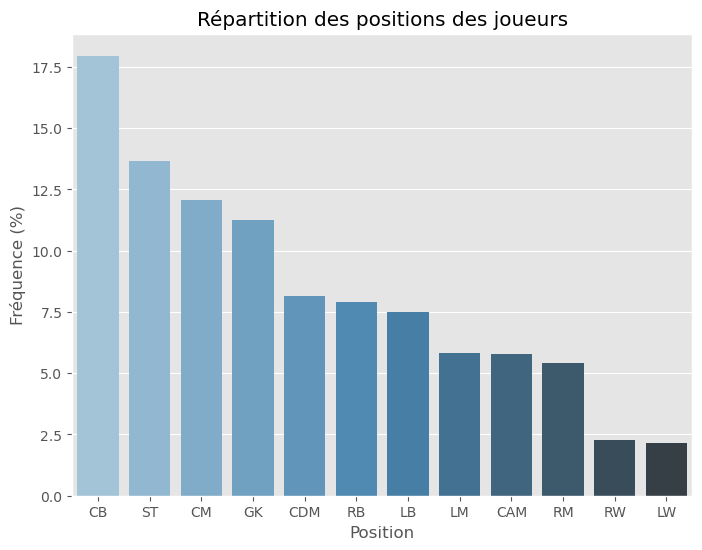

In [93]:
# Utilisation avec la variable 'Position'
analyse_categorielle(df, 'Position', titre_graphique="Répartition des positions des joueurs", titre_x="Position", titre_y="Fréquence (%)")

Dans le jeu EA Sports, les défenseurs centraux (CB) sont les plus représentés avec 3185 joueurs, soit 17,96 % des joueurs. Cela peut s'expliquer par les différentes tactiques de jeu utilisées. En effet, dans la majorité des formations, on retrouve au minimum deux défenseurs centraux. Parfois, selon les systèmes tels que le 3-4-3, le 5-3-2, ou encore le 3-5-2 (souvent utilisés en Série A, mais aussi dans d'autres ligues), une équipe peut aligner trois défenseurs centraux. Cette position clé est donc très demandée, quel que soit le championnat.

Les attaquants (ST) suivent, avec 13,67 % des joueurs.

En revanche, les milieux droits (RM), les ailiers droits (RW), et les ailiers gauches (LW) occupent les dernières positions avec respectivement 5,42 %, 2,27 %, et 2,16 % des joueurs.

## Variable Finition

In [94]:
def analyser_variable(df, variable, titre_boxplot="Boxplot de la variable", xlabel="Valeur", ylabel="Variable"):
    """
    Cette fonction calcule les résumés statistiques d'une variable dans un DataFrame et trace un boxplot.

    Arguments:
    df : pd.DataFrame - Le DataFrame contenant les données
    variable : str - Le nom de la variable à analyser
    titre_boxplot : str - Le titre du boxplot (par défaut : "Boxplot de la variable")
    xlabel : str - L'étiquette de l'axe des x du boxplot (par défaut : "Valeur")
    ylabel : str - L'étiquette de l'axe des y du boxplot (par défaut : "Variable")
    """

    # Calcul des résumés statistiques pour la variable sélectionnée
    resume_statistique = df[variable].describe(percentiles=[0.25, 0.5, 0.75])

    # Extraire les valeurs spécifiques
    min_value = resume_statistique['min']
    q1_value = resume_statistique['25%']
    median_value = resume_statistique['50%']
    q3_value = resume_statistique['75%']
    max_value = resume_statistique['max']
    mean_value = resume_statistique['mean']

    # Créer un tableau avec les informations demandées
    tableau_statistiques = pd.DataFrame({
        'Statistique': ['Min', 'Q1', 'Médiane', 'Q3', 'Max', 'Moyenne'],
        'Valeur': [min_value, q1_value, median_value, q3_value, max_value, mean_value]
    })

    # Afficher le tableau
    print("Résumé statistique pour la variable :", variable)
    print(tableau_statistiques)

    # Créer le boxplot avec la moyenne indiquée par un point rouge
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[variable], color="skyblue")

    # Ajouter un point rouge pour la moyenne
    plt.scatter(x=mean_value, y=0, color='red', s=100, label='Moyenne')

    # Titre et légendes
    plt.title(titre_boxplot)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()

    # Afficher le boxplot
    plt.show()

Résumé statistique pour la variable : Finishing
  Statistique     Valeur
0         Min  10.000000
1          Q1  36.000000
2     Médiane  54.000000
3          Q3  64.000000
4         Max  96.000000
5     Moyenne  49.962959


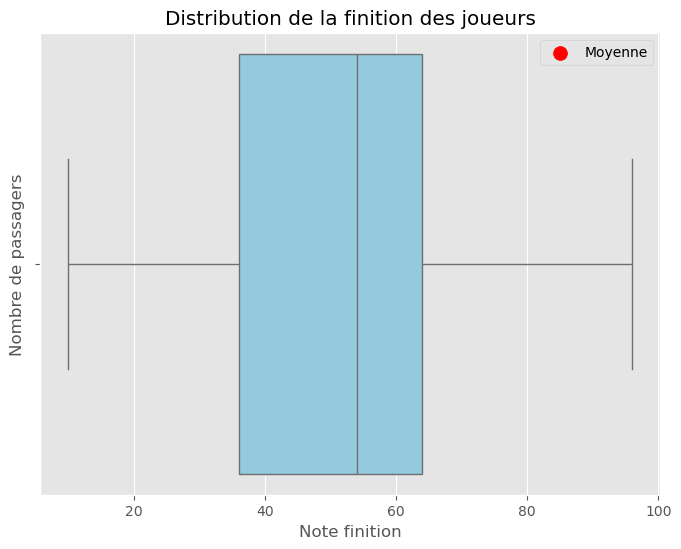

In [95]:
# Exemple d'utilisation
analyser_variable(df, 'Finishing', titre_boxplot="Distribution de la finition des joueurs", xlabel="Note finition", ylabel="Nombre de passagers")

Statistiques descriptives :

- **Min (10)** : La note la plus basse de finition parmi les joueurs est de 10. Cela signifie qu'il existe des joueurs avec une très faible capacité de finition, probablement des joueurs qui ne sont pas spécialisés dans le tir (comme des défenseurs).
Q1 (36) : Le premier quartile est de 36, ce qui signifie que 25 % des joueurs ont une note de finition inférieure à 36. Ce groupe de joueurs a des compétences de finition relativement faibles.
- **Médiane (54)** : La médiane est de 54, ce qui signifie que 50 % des joueurs ont une note de finition inférieure ou égale à 54, et 50 % ont une note supérieure. Cela indique que la finition des joueurs est plutôt modérée en général, avec une répartition assez équilibrée.
- **Q3 (64)** : Le troisième quartile est de 64, ce qui signifie que 75 % des joueurs ont une note de finition inférieure à 64. Les 25 % restants ont des compétences de finition plus élevées.
- **Max (96)** : La note la plus élevée de finition est de 96, ce qui suggère qu'il existe des joueurs exceptionnels avec des capacités de tir et de finition très avancées (comme les attaquants).
- **Moyenne (49.96)** : La moyenne est d'environ 50, ce qui est proche de la médiane (54). Cela indique une distribution symétrique des notes de finition.

Boîte centrale : La boîte du boxplot s'étend de 36 (Q1) à 64 (Q3), ce qui montre que 50 % des joueurs ont une note de finition comprise dans cet intervalle. La boîte est assez large, indiquant une diversité de niveaux de finition parmi les joueurs.
Ligne médiane : La ligne à l'intérieur de la boîte correspond à la médiane de 54. Cela reflète un niveau de finition médian, indiquant que la plupart des joueurs ont des compétences de finition moyennes.

## Clonclusion
La distribution des notes de finition montre que la plupart des joueurs ont une capacité de finition comprise entre 36 et 64, avec une note moyenne proche de 50.
Quelques joueurs exceptionnels ont des notes très élevées (jusqu'à 96), tandis que d'autres ont des notes très basses (jusqu'à 10), mais ces valeurs extrêmes sont rares. Cela reflète la variabilité des compétences de finition en fonction des rôles et des spécialités des joueurs (par exemple, attaquants vs défenseurs).
La moyenne proche de la médiane suggère qu'il n'y a pas de forte asymétrie dans la répartition des scores.


Analyser la variable "Finishing". Certains postes possède t-il une meilleur capacité "Finishing" que d'autre ?.
Nous attendons ici, au minimum, une analyse univariée pour "Finishing" et "Position" ainsi qu'une analyse bivariée entre les deux variables.
Proposer une interpretation aux résultats obtenus
J'ai déja fait l'analyse univarié des variables Finishing et Position il me faut une Analyse bivarié entre les deux variables je vous donnerez par la suite les résultats pour Proposer une interpretation aux résultats obtenus

je n'ai pas besoin de tests mettez moi juste une étude bivarié entre les deux variables tout en faisant attention des conclusions qu'on en en tirer sachant qu'on pas pas fait de test


In [114]:


def analyse_bivarie_boxplot(df, variable_x, variable_y, titre="Boxplot de la variable", xlabel="Variable X", ylabel="Variable Y", palette="Set3"):
    """
    Cette fonction trace un boxplot pour une analyse bivariée entre deux variables d'un DataFrame.

    Arguments:
    df : pd.DataFrame - Le DataFrame contenant les données
    variable_x : str - Le nom de la variable catégorielle (axe x)
    variable_y : str - Le nom de la variable numérique (axe y)
    titre : str - Le titre du graphique (par défaut : "Boxplot de la variable")
    xlabel : str - L'étiquette de l'axe des x (par défaut : "Variable X")
    ylabel : str - L'étiquette de l'axe des y (par défaut : "Variable Y")
    palette : str - La palette de couleurs pour le graphique (par défaut : "Set3")
    """

    # Créer un boxplot
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=variable_x, y=variable_y, data=df, palette=palette)

    # Ajouter un titre et des labels
    plt.title(titre)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Afficher le graphique
    plt.show()




C:\Users\samba\AppData\Local\Temp\ipykernel_2368\4197220650.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




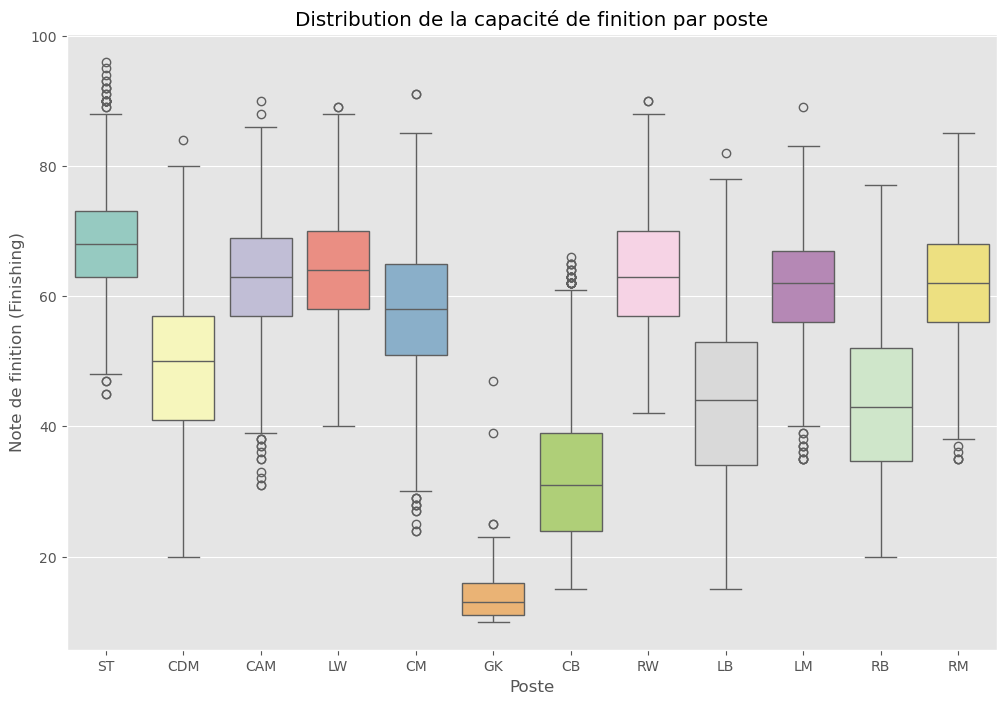

In [115]:

analyse_bivarie_boxplot(df, 'Position', 'Finishing', 
                        titre="Distribution de la capacité de finition par poste", 
                        xlabel="Poste", 
                        ylabel="Note de finition (Finishing)")

 Observation générale :

Le graphique montre la répartition des notes de finition pour chaque poste, avec les médianes, les quartiles (Q1 et Q3), et les valeurs extrêmes (whiskers et outliers).
Il est évident que certains postes, notamment les attaquants (ST) et les ailiers (RW, LW), ont des médianes plus élevées en termes de finition, ce qui reflète leur rôle dans l'équipe (marquer des buts).
Les joueurs ayant des responsabilités plus défensives, comme les gardiens (GK), les défenseurs centraux (CB) et les latéraux (RB, LB), présentent des notes de finition bien plus faibles, ce qui est attendu puisqu'ils ne sont pas spécialisés dans la finition.

Détails par poste :

 ST (Attaquant) :
La médiane est assez élevée (environ 75), ce qui montre que les attaquants sont naturellement les joueurs ayant les meilleures capacités de finition.
L'étendue des valeurs est assez large, allant d'environ 40 à près de 100, ce qui montre qu'il y a une grande diversité parmi les attaquants en termes de capacité de finition, des joueurs moyens aux grands buteurs.

 LW (Ailier gauche) et RW (Ailier droit) :
Les ailiers, comme prévu, montrent aussi de bonnes capacités de finition, avec des médianes autour de 60 à 70. Cependant, ils sont légèrement moins spécialisés dans la finition que les attaquants purs (ST).
La distribution pour ces postes est également large, reflétant une diversité dans le rôle des ailiers, certains étant plus concentrés sur les passes que sur les tirs.

CAM (Milieu offensif central) :
Les milieux offensifs ont une médiane plus basse que les ailiers ou les attaquants (environ 60), mais leur distribution reste assez élevée par rapport aux autres postes.
Cela montre que bien que leur rôle principal ne soit pas de marquer, ils contribuent aux actions offensives et aux tirs, d'où une finition relativement bonne.


CB (Défenseur central) :
Les défenseurs centraux ont des notes de finition nettement plus faibles, avec une médiane autour de 40. Cela correspond à leur rôle strictement défensif, où les compétences de tir ne sont pas cruciales.

Latéraux (LB, RB) :
Les arrières latéraux montrent des résultats similaires aux défenseurs centraux, avec des médianes autour de 50-55. Leur rôle principal est également défensif, mais ils peuvent contribuer aux actions offensives en se projetant vers l'avant.

Conclusion :

Postes offensifs : Les attaquants (ST) et les ailiers (LW, RW) ont les meilleures notes de finition, ce qui est cohérent avec leurs rôles de buteurs principaux dans les équipes.
Postes défensifs : Les défenseurs (CB, LB, RB) et les gardiens (GK) ont des notes de finition beaucoup plus faibles, comme attendu, car leur fonction principale est la défense, et non la contribution offensive.
Milieux de terrain : Les milieux de terrain (CAM, CM, CDM) montrent une variation plus large, avec les milieux offensifs (CAM) ayant des compétences de finition supérieures aux milieux plus défensifs (CDM), ce qui correspond à leurs rôles respectifs sur le terrain.

In [119]:
# Calculer la moyenne de la variable 'Finishing' par poste
moyenne_finition_par_poste = df.groupby('Position')['Finishing'].mean().reset_index()

# Trier les résultats par ordre décroissant
moyenne_finition_par_poste = moyenne_finition_par_poste.sort_values(by='Finishing', ascending=False)

# Afficher les résultats sous forme de tableau
print(moyenne_finition_par_poste)


   Position  Finishing
11       ST  68.355876
7        LW  64.104439
10       RW  63.798507
0       CAM  62.373047
6        LM  61.829952
9        RM  61.612903
3        CM  57.434783
2       CDM  49.352453
8        RB  43.500712
5        LB  43.484621
1        CB  32.693878
4        GK  13.858351


In [117]:

def representer_moyenne_par_categorie(df, variable_categorie, variable_moyenne, titre="Graphique des moyennes", xlabel="Catégorie", ylabel="Moyenne"):
    """
    Cette fonction calcule la moyenne d'une variable numérique par catégorie et crée un graphique interactif.

    Arguments:
    df : pd.DataFrame - Le DataFrame contenant les données
    variable_categorie : str - La variable catégorielle (ex: Position)
    variable_moyenne : str - La variable numérique à moyenniser (ex: Finishing)
    titre : str - Le titre du graphique (par défaut : "Graphique des moyennes")
    xlabel : str - Le label de l'axe des x (par défaut : "Catégorie")
    ylabel : str - Le label de l'axe des y (par défaut : "Moyenne")
    """

    # Calculer la moyenne de la variable par catégorie
    moyenne_par_categorie = df.groupby(variable_categorie)[variable_moyenne].mean().reset_index()

    # Trier par la moyenne (ordre décroissant)
    moyenne_par_categorie = moyenne_par_categorie.sort_values(by=variable_moyenne, ascending=False)

    

    # Créer un graphique pour visualiser la moyenne par catégorie
    fig = px.bar(
        moyenne_par_categorie,
        x=variable_categorie,
        y=variable_moyenne,
        title=titre,
        labels={variable_categorie: xlabel, variable_moyenne: ylabel}
    )

    # Afficher le graphique interactif
    fig.show()




In [118]:
# Utilisation avec les variables 'Position' et 'Finishing'
representer_moyenne_par_categorie(df, 'Position', 'Finishing', 
                                  titre="Finition moyenne par poste", 
                                  xlabel="Poste", 
                                  ylabel="Finition moyenne")

Les attaquants (ST) présentent la meilleure capacité de finition, avec une moyenne de 68.35. Cela est tout à fait cohérent avec leur rôle dans l'équipe, où ils sont les principaux responsables des buts marqués. Ils doivent avoir des compétences de finition élevées pour transformer les occasions en buts.

Les ailiers (LW, RW) suivent avec des notes moyennes de 64.10 et 63.7 respectivement. Bien qu'ils ne soient pas les principaux buteurs, leur rôle offensif implique souvent de marquer, surtout lorsqu'ils entrent dans la surface de réparation.

Les milieux offensifs (CAM) ont également une bonne capacité de finition, avec une moyenne de 62.7. Cela reflète leur rôle créatif mais aussi leur capacité à conclure des actions lorsqu'ils se trouvent dans des positions avancées.

Les milieux latéraux (LM, RM) montrent une finition moyenne autour de 61. Bien qu'ils ne soient pas aussi focalisés sur la finition que les attaquants ou les ailiers, ils restent des contributeurs importants aux phases offensives.

Les résultats montrent une cohérence générale avec les rôles des postes sur le terrain. Les joueurs offensifs, tels que les attaquants et les ailiers, ont naturellement des notes de finition plus élevées, tandis que les joueurs défensifs et les gardiens présentent les notes les plus faibles. Les milieux de terrain affichent des capacités de finition intermédiaires, avec les milieux offensifs étant plus enclins à marquer que les milieux défensifs.

# Question 2

               Position_CAM  Position_CB  Position_CDM  Position_CM  \
Position_CAM       1.000000    -0.115802     -0.073773    -0.091663   
Position_CB       -0.115802     1.000000     -0.139433    -0.173246   
Position_CDM      -0.073773    -0.139433      1.000000    -0.110368   
Position_CM       -0.091663    -0.173246     -0.110368     1.000000   
Position_GK       -0.088217    -0.166734     -0.106220    -0.131978   
Position_LB       -0.070561    -0.133362     -0.084960    -0.105563   
Position_LM       -0.061618    -0.116461     -0.074192    -0.092184   
Position_LW       -0.036772    -0.069501     -0.044277    -0.055014   
Position_RB       -0.072573    -0.137165     -0.087382    -0.108573   
Position_RM       -0.059243    -0.111972     -0.071333    -0.088632   
Position_RW       -0.037694    -0.071243     -0.045386    -0.056393   
Position_ST       -0.098506    -0.186180     -0.118608    -0.147371   
Finishing          0.175626    -0.464229     -0.010412     0.158575   
Dribbl

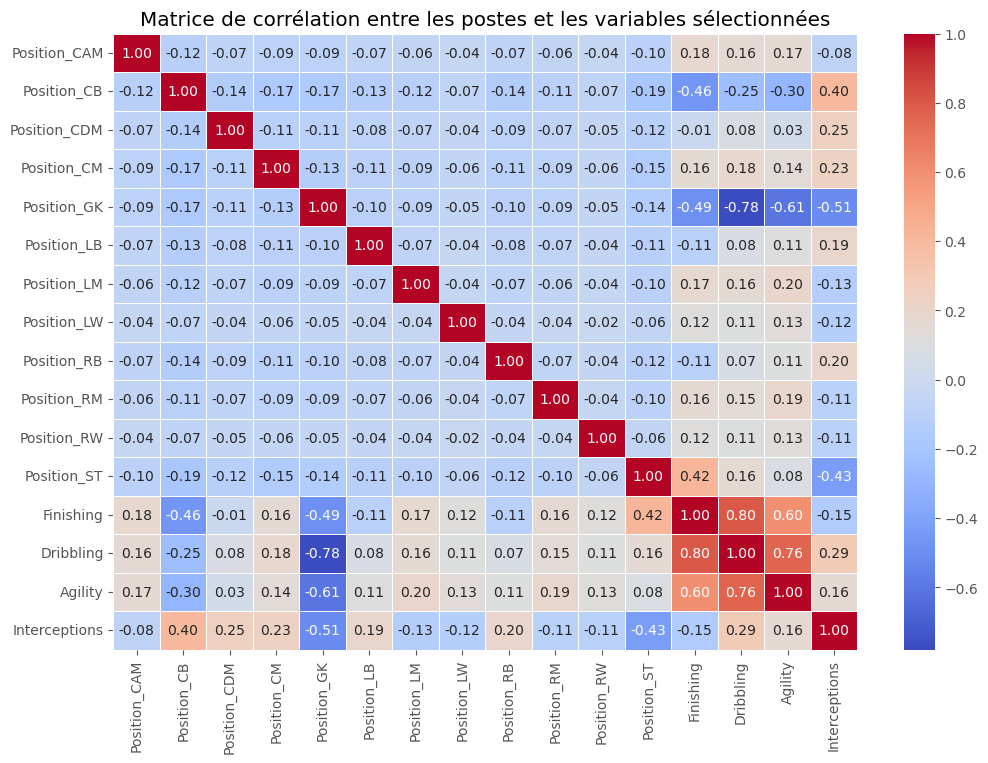

In [116]:

# Sélection des variables d'intérêt
variables = ['Finishing', 'Dribbling', 'Agility', 'Interceptions']

# Encodage des postes avec One-Hot Encoding (chaque poste sera une colonne avec des 0/1)
df_encoded = pd.get_dummies(df['Position'], prefix='Position')

# Fusionner les variables numériques avec les colonnes encodées
df_corr = pd.concat([df_encoded, df[variables]], axis=1)

# Calculer la matrice de corrélation
correlation_matrix = df_corr.corr()

# Afficher la matrice de corrélation sous forme de tableau
print(correlation_matrix)

# Visualiser la matrice de corrélation avec une heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation entre les postes et les variables sélectionnées")
plt.show()


**Postes fortement corrélés avec la Finishing (capacité de finition)** :

Position ST (Attaquant) : Corrélation de 0.42 avec Finishing, ce qui est cohérent puisque les attaquants sont généralement les meilleurs buteurs dans une équipe.
Les autres postes, comme les défenseurs (CB, GK), montrent des corrélations négatives avec Finishing, notamment GK (-0.49), ce qui est logique car ces postes ne sont pas impliqués dans la finalisation des actions offensives.

**Postes corrélés avec le Dribbling** :

Position ST (Attaquant) : Corrélation de 0.42 avec Dribbling, ce qui montre que les attaquants ont de bonnes compétences en dribble.
Position CAM (Milieu offensif) et RW (Ailier droit) : Corrélations de 0.16 et 0.15 respectivement, ce qui reflète le fait que les joueurs offensifs doivent être capables de dribbler pour se déplacer dans les zones offensives.
Les postes défensifs, tels que GK (-0.78) et CB (-0.25), montrent des corrélations négatives, car les joueurs à ces postes ne sont pas souvent impliqués dans des situations nécessitant de bonnes compétences en dribble.

**Postes corrélés avec l’Agility** :

Position ST (Attaquant) : Corrélation de 0.16 avec Agility, montrant que les attaquants doivent être agiles pour se déplacer rapidement autour des défenseurs.
Position CAM (Milieu offensif) et RW (Ailier droit) : Corrélations de 0.17 et 0.16, indiquant que ces postes nécessitent une bonne agilité pour créer des occasions offensives.
GK (-0.61) et CB (-0.30) présentent à nouveau des corrélations négatives, confirmant que l’agilité n’est pas une compétence clé pour les gardiens et défenseurs centraux.

**Postes corrélés avec les Interceptions** :

Position CB (Défenseur central) : Corrélation de 0.40 avec Interceptions, ce qui est attendu, car la capacité à intercepter des passes est essentielle pour les défenseurs centraux.
Position CDM (Milieu défensif) : Corrélation de 0.25 avec Interceptions, ce qui est cohérent avec le rôle du milieu défensif, qui doit récupérer les ballons dans la zone médiane.
Position GK (-0.51) et ST (-0.43) montrent des corrélations négatives, car ces postes sont rarement impliqués dans des situations d’interception.

Conclusions générales :

Postes offensifs (ST, RW, CAM) sont positivement corrélés avec des attributs telles que Finishing, Dribbling, et Agility, ce qui est logique, car ces compétences sont essentielles pour marquer des buts et créer des occasions.
Postes défensifs (CB, CDM) sont fortement corrélés avec Interceptions, ce qui correspond à leur rôle clé dans la récupération du ballon et la protection de la défense.
Les gardiens de but (GK) montrent des corrélations négatives avec presque toutes les variables offensives (Finishing, Dribbling, Agility), mais une corrélation négative forte avec Interceptions, car leur rôle est de protéger les cages, pas d’intercepter des passes.

Cette matrice nous permet de confirmer des relations évidentes entre les postes et certaines Attributs clés, bien que des tests statistiques supplémentaires seraient nécessaires pour tirer des conclusions plus définitives.